In [4]:
#! /usr/bin/python3
# author : Priyanshu Shrivastav (from IIT Palakkad, India)

import numpy as np, matplotlib.pyplot as plt
import csv, sys
from sklearn.preprocessing import MinMaxScaler

file_name = input("file index : ")
DATA_SIZE = 10000
PARAMETER_COUNT = 2
TRAIN_DATA_SET  = "../Train" + str(file_name) + ".csv"
TEST_DATA_SET   = "../Test" + str(file_name) + ".csv"
ALPHA           = 0.001

train_sz, test_sz, loss = 0, 0, []
X = np.ndarray((DATA_SIZE, PARAMETER_COUNT + 1)) # +1 for bias
Y = np.zeros(DATA_SIZE, dtype=int)
W = np.ndarray(PARAMETER_COUNT + 1)
min_max_scaler = MinMaxScaler()

class Perceptron:
    # Take training input data
    def take_training_input(self):
        global train_sz
        train_sz = 0
        with open(TRAIN_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[train_sz][p] = float(row[p])
                X[train_sz][PARAMETER_COUNT] = 1.0
                Y[train_sz] = float(row[PARAMETER_COUNT])
                if Y[train_sz] == 0:
                    Y[train_sz] = -1
                train_sz += 1

# plot training data data
    def show_data(self, title, xlab="", ylab=""):
        print('=== Data points given to train : {sz} ==='.format(sz=train_sz))
        plt.title(title)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        for train_data_index in range(train_sz):
            if (Y[train_data_index] == 1):
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'bo')
            else:
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'ro')

# find weights
    def find_weights(self):
        global train_sz, W, loss
        print("================================       TRAINING       ==================================")
        print("Training data size : {tz}".format(tz=train_sz))
        W = np.random.random(PARAMETER_COUNT + 1)
        ok = False
        epoch = 0
        while ok is False:
            if epoch > 500: # linear classification not possible
                break
            W_old, x_add, y_real = np.copy(W), [], 0
            epoch += 1
            ok = True
            err_cnt = 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and Y[tc] < 0):
                    x_add = np.copy(-1*X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                elif (y_hat < 0 and Y[tc] > 0):
                    x_add = np.copy(X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                loss.append(err_cnt)

            err_pos, err_neg, tp, tn = 0, 0, 0, 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and y_real < 0):
                    err_neg += 1
                elif (y_hat < 0 and y_real > 0):
                    err_pos += 1
                elif (y_real > 0):
                    tp += 1
                elif (y_real < 0):
                    tn += 1

            print("----------------------------------------------------------------------------------------")
            print("[ Epoch : {epoch} ], [ error count : {err} ]".format(epoch=epoch, err=err_cnt))
            print("W_old : {w_old}".format(w_old=W_old))
            print("W_new : {w_new}".format(w_new=W))
            print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
            print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))

    def draw_line_2d(self):
        global train_sz, W
        mx_x1, mx_x2 = -1e9, -1e9
        mn_x1, mn_x2 = 1e9, 1e9
        for tc in range(train_sz):
            mx_x1 = max(mx_x1, X[tc][0])
            mn_x1 = min(mn_x1, X[tc][0])
        X1 = np.linspace(mn_x1, mx_x1, 1000)
        # 0 = w[0]*x[0] + w[1]*x[1] + w[2]*x[3]
        X2 = []
        for x in X1:
            X2.append(-1*(W[0]*x + W[2]*1.0)/W[1])
        plt.plot(X1, X2)


    def take_test_input(self):
        global test_sz, X, Y
        test_sz = 0
        with open(TEST_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[test_sz][p] = float(row[p])
                X[test_sz][PARAMETER_COUNT] = 1.0
                Y[test_sz] = float(row[PARAMETER_COUNT])
                if Y[test_sz] == 0:
                    Y[test_sz] = -1
                test_sz += 1

    def test(self):
        global test_sz, X, Y, loss, W
        print("================================       TESTING        ==================================")
        print("Test Data size : ", test_sz)
        loss, err_pos, err_neg, tp, tn = [], 0, 0, 0, 0
        for tc in range(test_sz):
            y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
            if (y_hat > 0 and y_real < 0):
                err_neg += 1
            elif (y_hat < 0 and y_real > 0):
                err_pos += 1
            elif (y_real > 0):
                tp += 1
            elif (y_real < 0):
                tn += 1
        print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
        print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))
        print("============================         TESTING FINISHED          =========================")

    def draw_error_count(self):
        global loss, train_sz
        ep = [epoch + 1 for epoch in range(len(loss))]
        accuracy = [train_sz - x for x in loss]
        plt.title("Classification Error v/s iterations")
        plt.ylabel("Classification Error")
        plt.xlabel("Iterations")
        plt.plot(ep, loss, 'r')
        plt.show()

        plt.title("Classification Accuracy v/s iterations")
        plt.ylabel("Classification Accuracy")
        plt.xlabel("Iterations")
        plt.plot(ep, accuracy, 'b')
        plt.show()

file index :  1


In [13]:
t = Perceptron()
t.take_training_input()


In [14]:
t.find_weights()


================================       TRAINING       ==================================
Training data size : 960
----------------------------------------------------------------------------------------
[ Epoch : 1 ], [ error count : 355 ]
W_old : [0.98265203 0.58469586 0.03723403]
W_new : [ 0.0861075  -0.05881223 -0.21376597]
True positive : 471, False positive : 118
True negative : 359, False negative : 12
----------------------------------------------------------------------------------------
[ Epoch : 2 ], [ error count : 63 ]
W_old : [ 0.0861075  -0.05881223 -0.21376597]
W_new : [ 0.03418551 -0.00057317 -0.24276597]
True positive : 483, False positive : 6
True negative : 471, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 3 ], [ error count : 4 ]
W_old : [ 0.03418551 -0.00057317 -0.24276597]
W_new : [ 0.02438367 -0.00176648 -0.24476597]
True positive : 483, False positive : 0
True negative : 477, False negative

=== Data points given to train : 960 ===


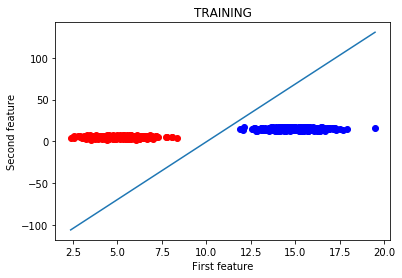

In [15]:
t.show_data("TRAINING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()


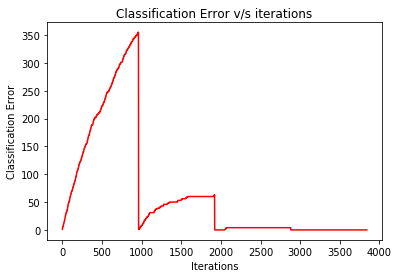

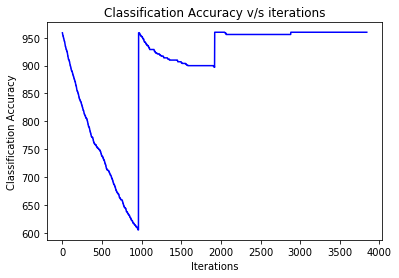

In [16]:
t.draw_error_count()


In [17]:
t.take_test_input()
t.test()


================================       TESTING        ==================================
('Test Data size : ', 240)
True positive : 117, False positive : 0
True negative : 123, False negative : 0
============================         TESTING FINISHED          =========================


=== Data points given to train : 960 ===


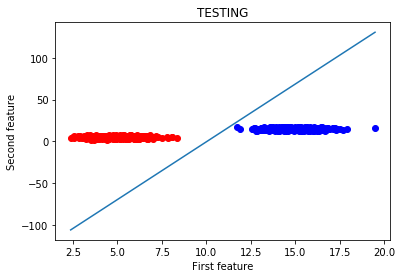

In [18]:
t.show_data("TESTING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()


In [12]:
#The data set was linearly seperable. And seperation was quite enough for 
#perceptron to halt in few iterations by finding a suitable line.
